In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
# import our dataset
data = pd.read_csv('avocado.csv')

In [3]:
# first 10 observations of our dataset
data.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [4]:
# renaming column names into meaningful names (refer kaggle's avacado dataset description)
data = data.rename(columns={'4046':'PLU_4046','4225':'PLU_4225','4770':'PLU_4770'})

In [5]:
# removing unnecessary column
data = data.drop(['Unnamed: 0'],axis = 1)
data.head(10)

,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [6]:
# convert the type of Date feature from obj to datetime type
data['Date'] = pd.to_datetime(data['Date'])

In [7]:
# categorizing into several seasons
def season_of_date(date):
    year = str(date.year)
    seasons = {'spring': pd.date_range(start='21/03/'+year, end='20/06/'+year),
               'summer': pd.date_range(start='21/06/'+year, end='22/09/'+year),
               'autumn': pd.date_range(start='23/09/'+year, end='20/12/'+year)}
    if date in seasons['spring']:
        return 'spring'
    if date in seasons['summer']:
        return 'summer'
    if date in seasons['autumn']:
        return 'autumn'
    else:
        return 'winter'

In [8]:
# creating a new feature 'season' and assign the corresponding season for the Date using map function over our season_of_date function
data['season'] = data.Date.map(season_of_date)


In [9]:
# now, we can see the season feature appended at the last
data.head(10)


,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,season
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,winter
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,autumn
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,autumn
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,autumn
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,autumn
5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany,autumn
6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany,autumn
7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany,autumn
8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany,autumn
9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany,autumn


In [10]:
# no of observations for each seasons
data.season.value_counts()

winter    5400
summer    4319
spring    4319
autumn    4211
Name: season, dtype: int64

In [11]:
# droping date feature
data = data.drop(['Date'],axis = 1)

In [12]:
# converting categorical features of text data into model-understandable numerical data
label_cols = ['type','region','season']
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data[label_cols] = data[label_cols].apply(lambda x : label.fit_transform(x))

In [13]:
# Scaling the features and 
# spliting the label encoded features into distinct features inorder to prevent our model to think that columns have data with some kind of order or hierarchy
# column_tranformer allows us to combine several feature extraction or transformation methods into a single transformer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
scale_cols = data.drop(['AveragePrice','type','year','region','season'],axis=1)
col_trans = make_column_transformer(
            (OneHotEncoder(), data[label_cols].columns),
            (StandardScaler(), scale_cols.columns),
            remainder = 'passthrough')

In [14]:
# splitting our dataset into train and test set such that 20% of observations are considered as test set
X = data.drop(['AveragePrice'],axis=1)
y = data.AveragePrice
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
pipe = make_pipeline(col_trans,linreg)
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  Index(['type', 'region', 'season'], dtype='object')),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  Index(['Total Volume', 'PLU_4046', 'PLU_4225', 'PLU_4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags'],
      dtype='object'))])),
                ('linearregression', LinearRegression())])

In [16]:
y_pred_test = pipe.predict(X_test)

In [17]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('MAE for testing set: {}'.format(mean_absolute_error(y_pred_test,y_test)))
print('MSE for testing set: {}'.format(mean_squared_error(y_pred_test,y_test)))
print('RMSE for testing set: {}'.format(np.sqrt(mean_squared_error(y_pred_test,y_test))))

MAE for testing set: 0.1936150717623558
MSE for testing set: 0.06506629415042815
RMSE for testing set: 0.2550809560716522


In [18]:
#Support Vector Regressor (SVR)
from sklearn.svm import SVR
svr = SVR()
pipe = make_pipeline(col_trans,svr)
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  Index(['type', 'region', 'season'], dtype='object')),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  Index(['Total Volume', 'PLU_4046', 'PLU_4225', 'PLU_4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags'],
      dtype='object'))])),
                ('svr', SVR())])

In [19]:
y_pred_test = pipe.predict(X_test)

In [20]:
print('MAE for testing set: {}'.format(mean_absolute_error(y_pred_test,y_test)))
print('MSE for testing set: {}'.format(mean_squared_error(y_pred_test,y_test)))
print('RMSE for testing set: {}'.format(np.sqrt(mean_squared_error(y_pred_test,y_test))))


MAE for testing set: 0.3211899345213229
MSE for testing set: 0.1630348345497504
RMSE for testing set: 0.4037757230812056


In [21]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dr=DecisionTreeRegressor()
pipe = make_pipeline(col_trans,dr)
pipe.fit(X_train,y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  Index(['type', 'region', 'season'], dtype='object')),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  Index(['Total Volume', 'PLU_4046', 'PLU_4225', 'PLU_4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags'],
      dtype='object'))])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [22]:
y_pred_test = pipe.predict(X_test)

In [23]:
print('MAE for testing set: {}'.format(mean_absolute_error(y_pred_test,y_test)))
print('MSE for testing set: {}'.format(mean_squared_error(y_pred_test,y_test)))
print('RMSE for testing set: {}'.format(np.sqrt(mean_squared_error(y_pred_test,y_test))))

MAE for testing set: 0.12750684931506848
MSE for testing set: 0.037546739726027394
RMSE for testing set: 0.1937698111833404


In [24]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor()
pipe = make_pipeline(col_trans,forest_model)
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  Index(['type', 'region', 'season'], dtype='object')),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  Index(['Total Volume', 'PLU_4046', 'PLU_4225', 'PLU_4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags'],
      dtype='object'))])),
                ('randomforestregressor', RandomForestRegressor())])

In [25]:
y_pred_test = pipe.predict(X_test)

In [26]:

print('MAE for testing set: {}'.format(mean_absolute_error(y_pred_test,y_test)))
print('MSE for testing set: {}'.format(mean_squared_error(y_pred_test,y_test)))
print('RMSE for testing set: {}'.format(np.sqrt(mean_squared_error(y_pred_test,y_test))))

MAE for testing set: 0.09698835616438357
MSE for testing set: 0.019165431487671233
RMSE for testing set: 0.13843927003444953


<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

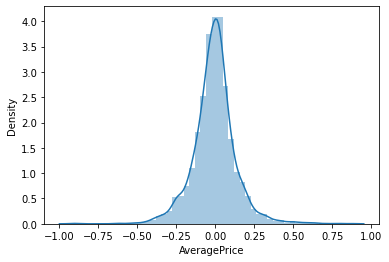

In [27]:
sns.distplot((y_test-y_pred_test),bins=50)

#Notice here that our residuals looked to be normally distributed and that's really a good sign which means that our model was a correct choice for the data.

RandomForestRegressor overperfomed LinearRegression, SVR and DecisionTreeRegressor with an RMSE of 0.147.

We can increase the performance to some more extent by tweaking the parameters of the models (especially for the models like RandomForestRegressor and DecisionTreeRegressor) and can use hyperparameter tuning techniques such as GridSearchCV and RandomizedSearchCV to find out the best parameters for our models!

Thanks! Please do Upvote if you like my notebook. Any Suggestions are welcome!

In [29]:

def get_avarage(df,column):
    """
    Description: This function to return the average value of the column 

    Arguments:
        df: the DataFrame. 
        column: the selected column. 
    Returns:
        column's average 
    """
    return sum(df[column])/len(df)


In [30]:
def get_avarge_between_two_columns(df,column1,column2):
    """
    Description: This function calculate the average between two columns in the dataset

    Arguments:
        df: the DataFrame. 
        column1:the first column. 
        column2:the scond column.
    Returns:
        Sorted data for relation between column1 and column2
    """
    
    List=list(df[column1].unique())
    average=[]

    for i in List:
        x=df[df[column1]==i]
        column1_average= get_avarage(x,column2)
        average.append(column1_average)

    df_column1_column2=pd.DataFrame({'column1':List,'column2':average})
    column1_column2_sorted_index=df_column1_column2.column2.sort_values(ascending=False).index.values
    column1_column2_sorted_data=df_column1_column2.reindex(column1_column2_sorted_index)
    
    return column1_column2_sorted_data


In [31]:
def plot(data,xlabel,ylabel):
    """
    Description: This function to draw a barplot

    Arguments:
        data: the DataFrame. 
        xlabel: the label of the first column. 
        ylabel: the label of the second column.
    Returns:
        None
    """
        
    plt.figure(figsize=(15,5))
    ax=sns.barplot(x=data.column1,y=data.column2,palette='rocket')
    plt.xticks(rotation=90)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(('Avarage '+ylabel+' of Avocado According to '+xlabel));


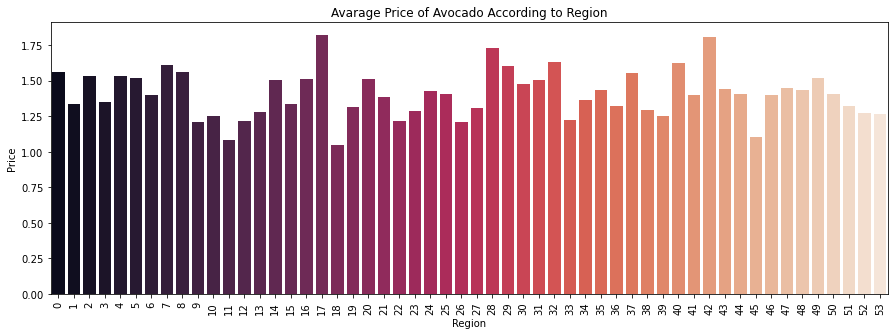

In [33]:
data1 = get_avarge_between_two_columns(data,'region','AveragePrice')
plot(data1,'Region','Price')

In [34]:
print(data1['column1'].iloc[-1], " is the region producing avocado with the lowest price.")

18  is the region producing avocado with the lowest price.


What is the highest region of avocado production?
Checking if there are outlier values or not.


Text(0.5, 1.0, 'Figure: Boxplot repersenting outlier columns.')

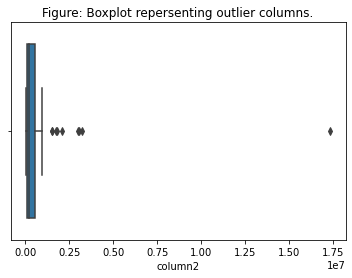

In [35]:
data2 = get_avarge_between_two_columns(data,'region','Total Volume')
sns.boxplot(x=data2.column2).set_title("Figure: Boxplot repersenting outlier columns.")

In [36]:
outlier_region = data2[data2.column2>10000000]
print(outlier_region['column1'].iloc[-1], "is outlier value")

51 is outlier value


In [37]:
outlier_region.index
data2 = data2.drop(outlier_region.index,axis=0)


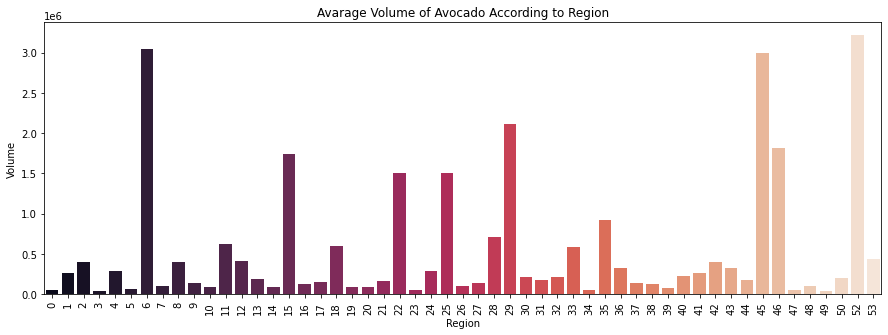

In [38]:
plot(data2,'Region','Volume')

# What is the average avocado prices in each year?


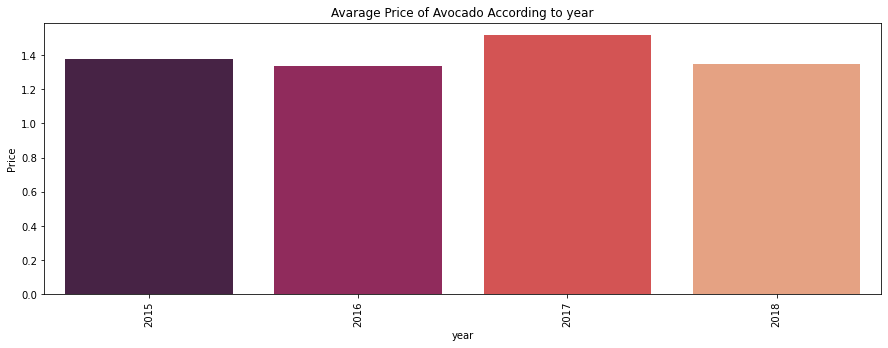

In [39]:
data3 = get_avarge_between_two_columns(data,'year','AveragePrice')
plot(data3,'year','Price')

# What is the average avocado volume in each year?



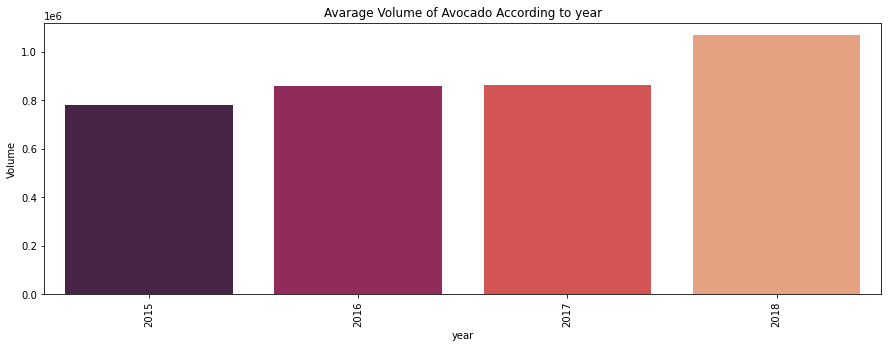

In [40]:
data4 = get_avarge_between_two_columns(data,'year','Total Volume')
plot(data4,'year','Volume')